## Classification in TF

In [14]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.models import Model

%matplotlib inline
print('imported modules')

imported modules


In [2]:
print('working in directory: {}'.format(os.getcwd()))

working in directory: /home/steven/Documents/car_eval


In [3]:
print(tf.__version__)

2.0.0


## Read in car evaluation data

In [4]:
cars = pd.read_csv('car_evaluation.csv', header = None)
cars.columns = ['price', 'maint', 'doors', 'people', 'lug_boot', 'safety', 'decision']
cars.head()

,price,maint,doors,people,lug_boot,safety,decision
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


(array([1210.,    0.,    0.,  384.,    0.,    0.,   65.,    0.,    0.,
          69.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

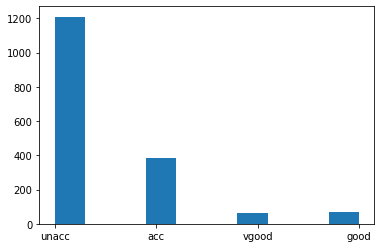

In [5]:
plt.hist(x = cars.decision)

## Convert categorical vars to numeric

In [6]:
list(cars.columns)

['price', 'maint', 'doors', 'people', 'lug_boot', 'safety', 'decision']

In [24]:
price = pd.get_dummies(cars.price, prefix = 'price')
maint = pd.get_dummies(cars.maint, prefix = 'maint')

doors = pd.get_dummies(cars.doors, prefix = 'doors')
people = pd.get_dummies(cars.people, prefix = 'people')

lug_boot = pd.get_dummies(cars.lug_boot, prefix = 'lug_boot')
safety = pd.get_dummies(cars.safety, prefix = 'safety')

labels = pd.get_dummies(cars.decision, prefix = 'condition')

In [25]:
X = pd.concat([price, maint, doors, people, lug_boot, safety], axis = 1)

In [26]:
labels.head()

,condition_acc,condition_good,condition_unacc,condition_vgood
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0


In [27]:
X.head()

,price_high,price_low,price_med,price_vhigh,maint_high,maint_low,maint_med,maint_vhigh,doors_2,doors_3,...,doors_5more,people_2,people_4,people_more,lug_boot_big,lug_boot_med,lug_boot_small,safety_high,safety_low,safety_med
0,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,1,0
1,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
2,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,0,1,1,0,0
3,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,1,0
4,0,0,0,1,0,0,0,1,1,0,...,0,1,0,0,0,1,0,0,0,1


In [28]:
y = labels.values

## Split data into train/test

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 42)

In [30]:
y.shape

(1728, 4)

## Create classification model

In [31]:
input_layer = Input(shape = (X.shape[1],))
dense_layer_1 = Dense(15, activation = 'relu')(input_layer)
dense_layer_2 = Dense(10, activation = 'relu')(dense_layer_1)
output = Dense(y.shape[1], activation = 'softmax')(dense_layer_2)

model = Model(inputs = input_layer, outputs = output)
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 21)]              0         
_________________________________________________________________
dense_9 (Dense)              (None, 15)                330       
_________________________________________________________________
dense_10 (Dense)             (None, 10)                160       
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 44        
Total params: 534
Trainable params: 534
Non-trainable params: 0
_________________________________________________________________
None


## Train model

In [32]:
history = model.fit(X_train, y_train, batch_size = 8, epochs = 50, verbose = 1, validation_split = .2)

Train on 1105 samples, validate on 277 samples
Epoch 1/50
1105/1105 [==============================] - 2s 2ms/sample - loss: 1.0784 - acc: 0.5919 - val_loss: 0.8297 - val_acc: 0.6498
Epoch 2/50
1105/1105 [==============================] - 1s 902us/sample - loss: 0.6135 - acc: 0.7403 - val_loss: 0.6078 - val_acc: 0.7220
Epoch 3/50
1105/1105 [==============================] - 1s 932us/sample - loss: 0.4487 - acc: 0.8317 - val_loss: 0.5172 - val_acc: 0.7798
Epoch 4/50
1105/1105 [==============================] - 1s 986us/sample - loss: 0.3777 - acc: 0.8615 - val_loss: 0.4596 - val_acc: 0.8123
Epoch 5/50
1105/1105 [==============================] - 1s 983us/sample - loss: 0.3300 - acc: 0.8833 - val_loss: 0.4140 - val_acc: 0.8375
Epoch 6/50
1105/1105 [==============================] - 1s 1ms/sample - loss: 0.2947 - acc: 0.8914 - val_loss: 0.3814 - val_acc: 0.8087
Epoch 7/50
1105/1105 [==============================] - 1s 1ms/sample - loss: 0.2589 - acc: 0.9014 - val_loss: 0.3402 - val_acc: 

In [33]:
score = model.evaluate(X_test, y_test, verbose = 1)

print("Test Score:", score[0])
print("Test Accuracy", score[1])

346/346 [==============================] - 0s 215us/sample - loss: 0.0911 - acc: 0.9624
Test Score: 0.09114016341704961
Test Accuracy 0.96242774
